# Topic 31: Support Vector Machines

- onl01-dtsc-ft-022221
- 05/13/21

## Learning Objectives

- To revisit Linear (Algebra) Equations and revisit the relationship between $y=mx+b$ and $y= w^TX+B$.
- To understand how support vector machine attempts to separate groups.
- Discuss the advantages / disadvantages of SVMs

- To gain an intuitive understanding the math notation of SVMs

- Learn about using kernels with SVMs

- "Activity": Apply muiltiple types of SVCs with a small data set vs Iowa Prisoners.





##  Questions

## Resources

#### BLOG POSTS/ARTICLES

- [Towards Data Science - SVM Simply Explained](https://towardsdatascience.com/support-vector-machine-simply-explained-fee28eba5496)
- [Towards Data Science Article - SVM Feature Selection and Kernels](https://towardsdatascience.com/svm-feature-selection-and-kernels-840781cc1a6c)
- [Blog Post on SVC Hyperparameter Tuning](https://medium.com/all-things-ai/in-depth-parameter-tuning-for-svc-758215394769)

- [Quora Q&A About Choosing Kernels](https://qr.ae/pGvISe)


    
   

 #### STUDY GROUP RECORDINGS:

- [Support Vector Machines - Victor](https://www.youtube.com/watch?v=_QmnoubpU3Q&list=PLVoXE6pv5LIg4WOllQ4rNPi9BtvtVMb78&index=5)
- [The Kernel Trick - Victor](https://www.youtube.com/watch?v=mnN74NI4Gqk&list=PLVoXE6pv5LIg4WOllQ4rNPi9BtvtVMb78&index=6)

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import seaborn as sns
plt.rcParams['figure.figsize']
import sklearn.datasets as datasets

# Loading in an example dataset
plt.style.use('seaborn-notebook')
iris = datasets.load_iris()
iris_data = iris.data

# Only use two targets/classifications
iris_targets = np.where(iris.target == 0, 0, 1)

plt.rcParams['figure.figsize'] = (10,7)

# Motivation

## How can we separate the data?


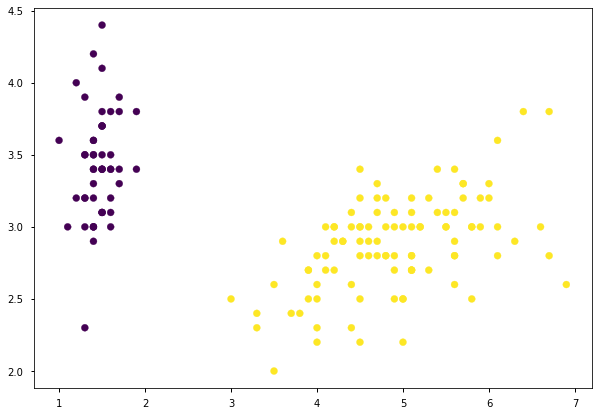

In [3]:
# Plotting different points
def plot_iris():
    fig, ax = plt.subplots()
    ax.scatter(x=iris_data[:,2], y=iris_data[:,1], c=iris_targets)
    return fig,ax

fig,ax= plot_iris()

### Q1: Look at these lines, which is a better model?



- 

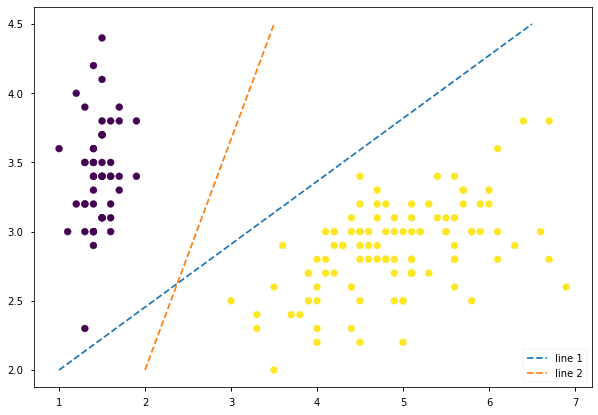

In [4]:
# Plotting lines to separate points
fig,ax=plot_iris()
l1 = np.array([[1,2],[6.5,4.5]])
ax.plot(l1[:,0], l1[:,1], linestyle='--',label='line 1')
l2 = np.array([[2,2],[3.5,4.5]])
ax.plot(l2[:,0], l2[:,1], linestyle='--',label='line 2')

ax.legend()

#### A1: 

- Line 2.

### Q2: Why is it better? 

- 

#### A2:

- Maximizes the distance between the data points and the line (the margin).


### Accuracy isn't everything

> Could say each line classifies the same (accuracy), so which of the following would be better?

(1.0, 5.0)

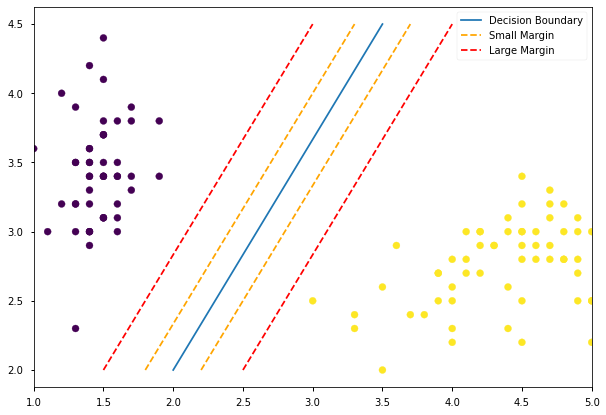

In [6]:
# Small margin
margin_small = np.array([0.2,0])
l2_margin_pos_small = l2 + margin_small
l2_margin_neg_small = l2 - margin_small

## Large margin
margin_larger = np.array([0.5,0])
l2_margin_pos_big = l2 + margin_larger
l2_margin_neg_big = l2 - margin_larger

# Plotting different points
fig,ax = plot_iris()
# Plotting lines to separate points
ax.plot(l2[:,0], l2[:,1], linestyle='-', label='Decision Boundary')

# Plot with margins
ax.plot(l2_margin_pos_small[:,0], l2_margin_pos_small[:,1], 
        linestyle='--', color='orange', label='Small Margin')
ax.plot(l2_margin_neg_small[:,0], l2_margin_neg_small[:,1], linestyle='--', color='orange')

ax.plot(l2_margin_pos_big[:,0], l2_margin_pos_big[:,1], 
        linestyle='--', color='red',label='Large Margin')
ax.plot(l2_margin_neg_big[:,0], l2_margin_neg_big[:,1], linestyle='--', color='red')
ax.legend()
ax.set_xlim(1,5)

#### Line Definitions/Legend
- Blue = Model
- Possible Margins:
    - orange
    - red
    
- Left and Right margins are called negative and positive hyperplanes

### Q3: Which margin is better? Why?

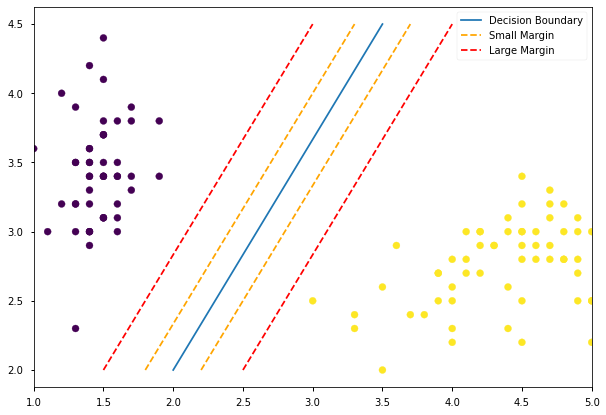

In [7]:
fig

- 

#### A3:

- The larger margin (red). 
- The smaller the margin the more you're assuming your model is correct and the more likely it will be over-fit and not generalize well.
<!--- > <img src="https://raw.githubusercontent.com/jirvingphd/dsc-introduction-to-support-vector-machines-online-ds-pt-100719/master/images/new_SVM_test2.png"> --->

# Support Vector Machines 



<img src="https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/images/i_support_vector_machines.jpg" width=60%>

> Available on Amazon. Ask me how I know. 😅

## Support Vector Machine - Max-Margin  Classifier

> Our goal is to **maximize the separation between the two hyperplanes.**

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-introduction-to-support-vector-machines-online-ds-pt-100719/master/images/new_SVM_4.png" width=70%>
 

### Terminology

#### Hyperplane: 

- a $n$-dimensional line.
- These hyperplanes are defined by two terms: $w_T$ and $b$. 
    - $w_T$ term is called the **weight vector** and contains the weights that are used in the classification.
    - $b$ term is called the **bias** and functions as an offset term. 
        - If there were no bias term, the hyperplane would always go through the origin which would not be very generalizable! 

#### Reminder: Linear Equation Notation vs Linear Regression

> **in Linear Regression, we predict $y$ using 2 parameters, m (slope) + b(intercept/constant):**
$$ \large y = mx+b $$
where: 
- $x$ = input data for modeling
- $y$ = model] predictions
- $m$ = slope
- $b$ = intercept

>**In Linear Model Formulas, terminology/notation changes:**
- slopes $(m)$ becomes **weights ($w$)**
- constants $b$ becomes **biases ($b$)**
$$ \large y =  XW^T+B $$
- $x$ = input data for modeling
- $y$ = model] predictions
- $w$ is the weight (slope)
- $b$ is the bias (constant)

<!---<img src="https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/images/linear _model_multi_inputs_and_outputs.png" width=40%>

<img src="https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/images/linear_model_multi_inputs.png" width=40%>

<!---<img src="https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/images/linear_model_multi_inputs_arrows.png" width=40%>
--->

#### Decision boundary: 

- The hyperplane that divides/separates the classes
<img src="https://raw.githubusercontent.com/jirvingphd/dsc-introduction-to-support-vector-machines-online-ds-pt-100719/master/images/new_SVM_2.png" width=30%>

#### Margin

- The distance between the decision boundary and the closes datapoints
<img src="https://raw.githubusercontent.com/jirvingphd/dsc-introduction-to-support-vector-machines-online-ds-pt-100719/master/images/new_SVM_4.png" width=30%>
 

#### Support Vector:

- "Support vectors are the data points nearest to the hyperplane, the points of a data set that, if removed, would alter the position of the dividing hyperplane. Because of this, they can be considered the critical elements of a data set." - [KDnuggets - SVM simple explanation](https://www.kdnuggets.com/2016/07/support-vector-machines-simple-explanation.html) 

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-introduction-to-support-vector-machines-online-ds-pt-100719/master/images/new_SVM_fin.png" width=60%>

#### Positive/Negative Hyperplanes

> Note: For SVMs, we do not represent our classes as 0 and 1, instead we use -1 and +1

- Positive Hyperplane:
    - The line defined by the support vectors to the right (+) of the decision boundary
    $$ b + w_Tx_{pos} =1$$

    
- Negative Hyperplane:
    - The line defined support vector to the left (-) of the decision boundary
    $$ b + w_Tx_{neg} =-1$$


### Max Margin Optimization/Calculation

 
- To maximize the margins between hyperplanes, first subtract the negative hyperplane's equation from the positive hyperplane's equation:

$$ \large w_T(x_{pos}-x_{neg}) = 2$$

- Normalize $w_T$ by dividing both sides of the equation by its norm, $||w||$
    - Note: $ || w ||= \sqrt{\sum^m_{j-1}w_j^2} $

> **The equation becomes:**
$$ \large \dfrac{w_T(x_{pos}-x_{neg})}{\lVert w \rVert} = \dfrac{2}{\lVert w \rVert}$$

- The left side of the equation = the distance between the positive and negative hyperplanes. (This is the **margin**)

- The objective of the SVM is then maximizing $\dfrac{2}{\lVert w \rVert}$ under the constraint/requirement that the samples are classified correctly. 

<!---This can also be written in one line as follows:
- Note that maximizing $\dfrac{2}{\lVert w \rVert}$ means we're minimizing $\lVert w \rVert$, or
    - as is done in practice because it seems to be easier to be minimized, $\dfrac{1}{2}\lVert w \rVert^2$.

> Contraints expressed mathematically:
- $ b + w_Tx^{(i)} \geq 1$  if $y ^{(i)} = 1$
- $ b + w_Tx^{(i)} \leq -1$  if $y ^{(i)} = -1$<br>
For $i= 1,\ldots ,N$
> These equations say that:
- all negative samples should fall on the left side of the negative hyperplane
- whereas all the positive samples should fall on the right of the positive hyperplane. 



$y ^{(i)} (b + w_Tx^{(i)} )\geq 1$  for each $i$
--->

## But what if my data isn't easily separable?
- When does maximizing the margin cause problems?

<img src="https://raw.githubusercontent.com/learn-co-students/dsc-introduction-to-support-vector-machines-online-ds-pt-100719/master/images/new_SVM_C.png">

>- So Where do we go from here?/ What can we do about this?

### Two Types of SVM Max-Margin Classifier


- Two kinds of max-margin classifiers:
    - hard margin = no errors whatsoever
    - soft margin = allows for errors


## The Soft-Margin Classifier

- The linear constraints need to be relaxed for data that are not linearly separable.
- We do this by adding slack variables $\xi$ to our margins. 
    - By adding some slack ( allowance for misclassification), we improve model generalizability while sacrificing accuracy
> Soft Margine Constraints:
>- $ b + w_Tx^{(i)} \geq 1-\xi^{(i)}$  if $y ^{(i)} = 1$
>- $ b + w_Tx^{(i)} \leq -1+\xi^{(i)}$  if $y ^{(i)} = -1$<br>For $i= 1,\ldots ,N$


- The objective function (AKA the function you want to minimize) is 

 $$\dfrac{1}{2}\lVert w \rVert^2+ C(\sum_i \xi^{(i)})$$
- The hyperparameter $C$ is used to define how much slack is allowed.


### The Hyperparameter $C$

Q: What happens if $C$ is very large? (What errors do we care about more?)


- C determines the amount of allowed misclassified data point. 
    - When C is large, misclassifications are heavily punished, so we get left figure. 

    - When C is small, misclassifications are accepted to maximize overall margin, and we get right figure.
    
-  **Important note: scikit-learn's `c` is really the inverse of C (`1/C`)**: 
    - So using a higher value of `c` is a smaller regularization or smaller penalty, allowing more misclassified data points. 
    - whereas a lower value of `c` is a higher penalty and allowed fewer misclassified datapoints.
        
        
<img src="https://raw.githubusercontent.com/learn-co-students/dsc-introduction-to-support-vector-machines-online-ds-pt-100719/master/images/new_SVM_C.png">



<!---=
## Classification error

We minimize the two kinds of error:
 - how many are "misclassified" 
 - how many are in bad boundary (within margin)
 

This gives us something like this:

$Error_{total} = Error_{classification} + Error_{margin}$
 

- We start from our margin to count the error (instead of the center)

## Margin error

- $E = |W|^2 = ||W_1||+||W_2|| + …$ 
    + big vs small margin (we want very large)
- $M = \frac{2}{||W||}$ 
    + inverse proportion, large margin → small error

Turns out to the same as the L2 Regularization!

## Gradient Descent to minimize--->

# The Kernel Trick

### Kernel Function Resources

- **Blog Posts/Articles**
    - [Blog Post on Hyperparameter Tuning](https://medium.com/all-things-ai/in-depth-parameter-tuning-for-svc-758215394769)
    - 

- **Scikit-Learn Documentation:**
    - [SVMs for Classification](https://scikit-learn.org/stable/modules/svm.html#classification)
    - [Scikit-Learn Docs: Kernel Functions](https://scikit-learn.org/stable/modules/svm.html#svm-kernels)

        - [Scikit-Learn SVM Math Equations](https://scikit-learn.org/stable/modules/svm.html#mathematical-formulation)

> #### Q: But what do we do when don't have linearly separable data??

<img src="https://raw.githubusercontent.com/learn-co-students/dsc-the-kernel-trick-online-ds-pt-100719/master/images/new_SVM_nonlin.png" width=60%>

> #### A: When a simple model isn't good enough, extend to higher dimensions.

> Use a kernel function to transform the data into a higher dimension and then separate the data in the higher dimension.

<img src="https://raw.githubusercontent.com/learn-co-students/dsc-the-kernel-trick-online-ds-pt-100719/master/images/new_SVM_kernel.png" width=60%>


## scikit-learn kernels + hyperparameters for `SVC`

- Summarizing the available functions and their hyperparameters.

- Recall that in general, `C` is the parameter for balancing standard accuracy metrics for tuning classifiers versus the decision boundary distance.

#### 1. Radial Basis Functions (RBF) Kernel
$$\exp{(-\gamma \lVert  x -  x' \rVert^2)} $$
- [Hyperparameters](https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html):
    1. `C`
    2. $\gamma$, which can be specified using `gamma` in scikit-learn (default='auto')
        - Large gamma = overfitting
        - Small gamma = underfitting

#### 2. Polynomial Kernel
$$(\gamma \langle  x -  x' \rangle+r)^d $$
- Hyperparameters:
    1. $\gamma$, which can be specified using `gamma` in scikit-learn
    2. $r$, which can be specified using `coef0` in scikit-learn
    3. $d$, which can be specified using `degree` in scikit-learn

#### 3. Sigmoid Kernel
$$\tanh ( \gamma\langle  x -  x' \rangle+r) $$
- Hyperparameters:
    1. $\gamma$, which can be specified using `gamma` in scikit-learn
    2. $r$, which can be specified using `coef0` in scikit-learn


### Other Types of SVC Models in sklearn

#### NuSVC
- Like SVC, NuSVC but adds a parameter $v$ (see hyperparameters below). 
- NuSVC implements "one-against-one" approach when number of classes >2
    - when there are n classes, $\dfrac{n*(n-1)}{2}$ classifiers are created, and each one classifies samples in 2 classes. 


- Hyperparameters:
    - $v$: controls the number of support vectors and training errors
        - creates upper bound on training errors
        - creates lower bound on support vectors


##### LinearSVC
- Like SVC but LinearSVC implements "one-vs-rest" so when there are $n$ classes, just $n$ classifiers are created and each one classifies samples in 2 classes (class of interest and all others)
- LinearSVC generates more classifiers, so LinearSVC tends to scale better.

### But there's sooo many options. How do I pick a kernel?!?

> - To keep it simple:
    - If your data looks linearly separable, use linear SVC, otherwise use RBF
    - But I am sure you can find some technical papers discussing the tradeoffs of all of the options.
     - (I wasn't able to find a good high-level comparison or use-case type of article.)

# 📙ACTIVITY: Classification with Support Vector Machines


> - Jump over to the `Support-Vector-Machines-Iowa_prisoners.ipynb` notebook in the same folder as this notebook. 

- Run the `MODEL` section 2-3 times, changing the dataset used each time.


-  Modify the `PRISONERS` and `RESAMPLED_PRISONERS` to control the dataset used:
    1. `PRISONERS` = False,`RESAMPLED_PRISONERS` = False
        - Small dataset ~50/50 split.
    2. `PRISONERS` = True, `RESAMPLED_PRISONERS` = False
        - Large imbalanced dataset.
    3. `PRISONERS` = True, `RESAMPLED_PRISONERS` = True
        - Large balanced dataset.
    
   

___

# APPENDIX

## Note re: predictions/probability

> You can make predictions using support vector machines. The SVC decision function gives a probability score per class. However, this is not done by default. You'll need to set the `probability` argument equal to `True`. Scikit-learn internally performs cross-validation to compute the probabilities, so you can expect that setting `probability` to `True` makes the calculations longer. For large datasets, computation can take considerable time to execute.

- In other words:
    - If you want to get the probabiltiies (`.predict_proba`) for ROC AUC, you would have to instantiate your SVC with the parameter `SVC(probability=True)`
    - https://www.kaggle.com/c/home-credit-default-risk/discussion/63499